In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, irfft
import scipy.signal as sig
from scipy.io import wavfile
%matplotlib inline

In [54]:
# Function for cleaning signals, didn't think we would want to keep doing the same code over and over

def cleaning(samplerate,data,freqCutoff):
    N = data.shape[0]
    length = N / samplerate
    T0 = length
    dt = T0/N
    time = np.linspace(0., length, data.shape[0])
    
    Vdusty = (2/N)*fft(data[:, 1])
    freq = fftfreq(N,dt)
    
    VCleanf = Vdusty.copy()

    for i in range(len(freq)):
        if abs(freq[i]) > freqCutoff:
            VCleanf[i] = 0       

    VClean = ifft(N*VCleanf)
    VC = np.real(VClean)
    return time,VClean,freq

In [4]:
samplerate, data = wavfile.read('songs/holy-wars-intro.wav')

<ipython-input-4-b9064f7ddc31>:1: WavFileWarning: Reached EOF prematurely; finished at 16772276 bytes, expected 16772284 bytes from header.
  samplerate, data = wavfile.read('songs/holy-wars-intro.wav')


In [5]:
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

number of channels = 2
length = 87.355375s


C:\Users\adama\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


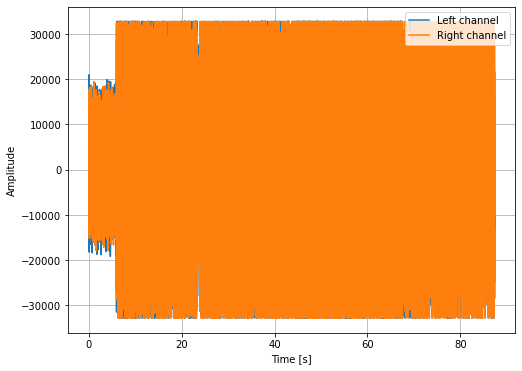

In [6]:
N = data.shape[0]
T0 = length
dt = T0/N
time = np.linspace(0., length, data.shape[0])

fig = plt.figure(figsize=(8,6))
plt.plot(time, data[:, 0], label="Left channel")

plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

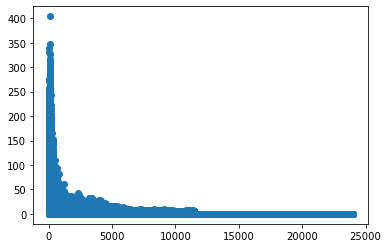

In [17]:
Vdusty = (2/N)*fft(data[:, 1])
freq = fftfreq(N,dt)
plt.scatter(freq[0:N//2], np.abs(Vdusty[0:N//2]))

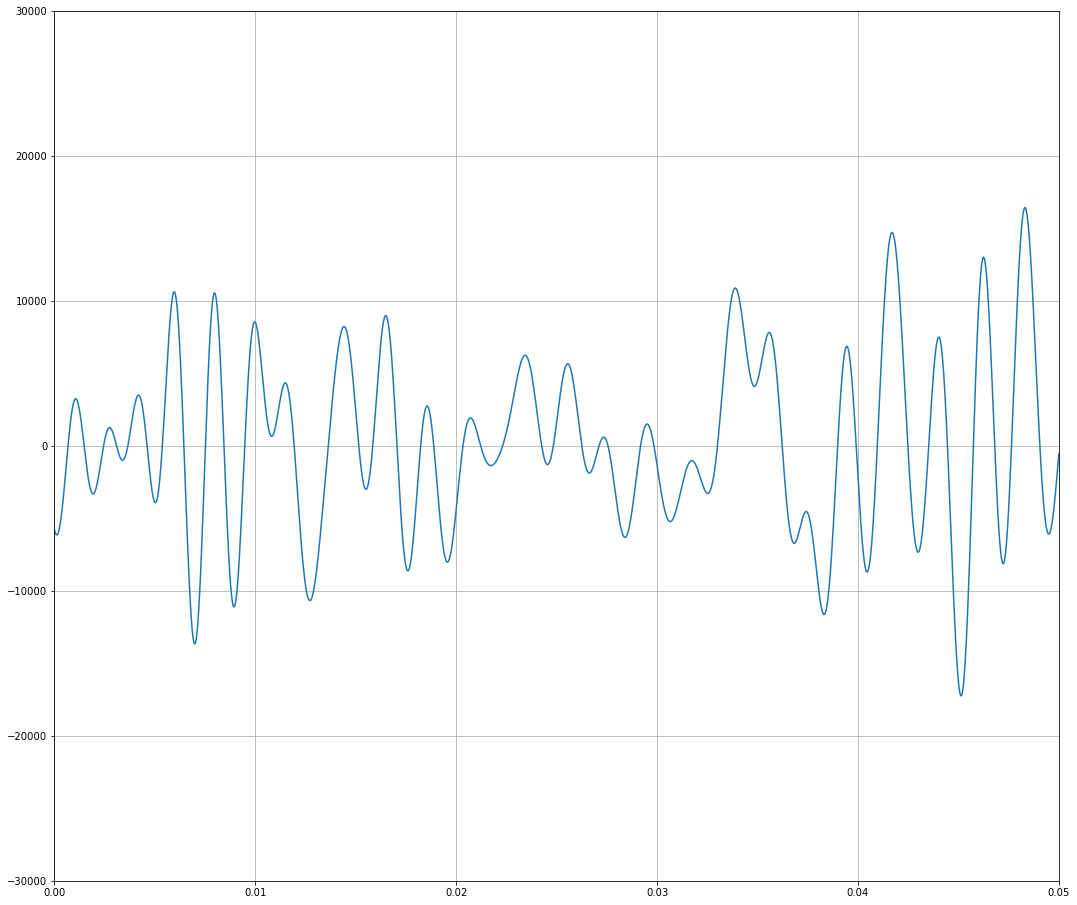

In [12]:
VCleanf = Vdusty.copy()

for i in range(len(freq)):
    if abs(freq[i]) > 600:
        VCleanf[i] = 0

VClean = ifft(N*VCleanf)
VC = np.real(VClean)
plt.figure(figsize=(18,16))
plt.plot(time,(VC))
plt.axis([0,0.05,-30000,30000])
plt.grid()

<ipython-input-67-32e64c67c7dc>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read('songs/peace-sells-intro.wav')


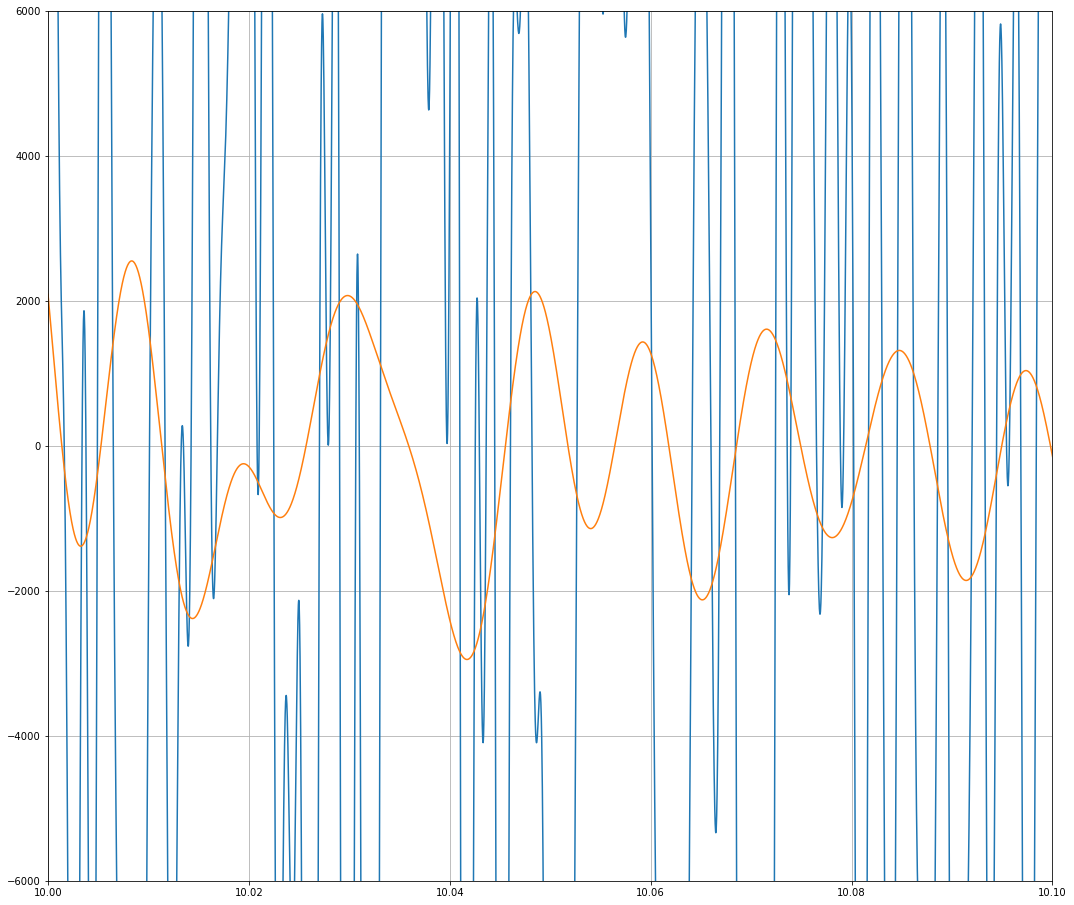

In [67]:
# Overlaying signals from the intro for Peace Sells and Holy Wars

samplerate1, data1 = wavfile.read('songs/peace-sells-intro.wav')
pSells = cleaning(samplerate1,data1,100)

pfreq = pSells[2]
pVClean = pSells[1]
ptime = pSells[0]

plt.figure(figsize=(18,16))
plt.plot(time,(VC))
plt.plot(ptime,np.real(pVClean))
plt.axis([10,10.1,-6000,6000])
plt.grid()

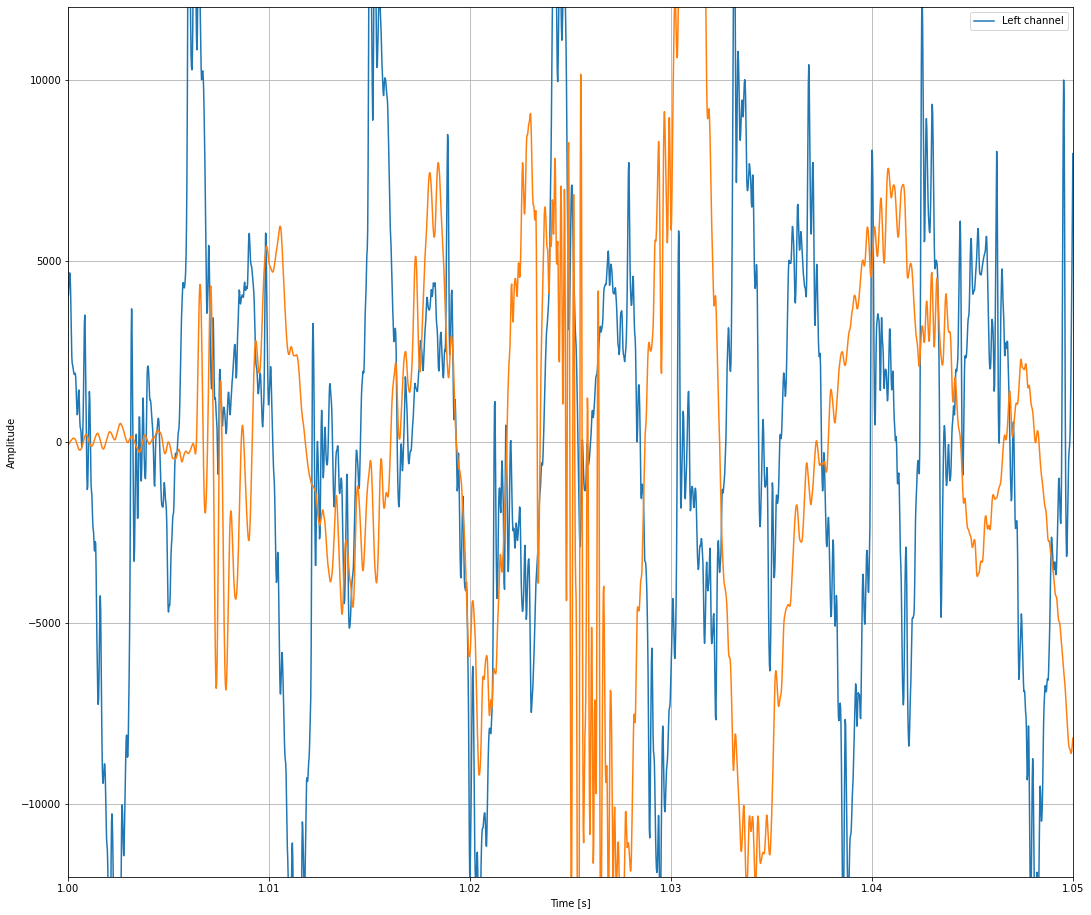

In [68]:
# Same thing as above but with dusty signals

fig = plt.figure(figsize=(18,16))

plt.plot(time, data[:, 0], label="Left channel")
plt.plot(ptime, data1[:, 0])

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.axis([1,1.05,-12000,12000])
plt.grid()